# **DATA PREPARATION FOR GEN DF**

# Library


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector

# Read The Data

# **Train DataSet**

In [33]:
# loading the datset
train = pd.read_csv("../raw_data/train.csv")
train.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

# Features Selection

In [34]:
# DROP UNNECESSARY COLUMNS
train.drop("Patient Id",axis=1,inplace=True)
train.drop("Family Name",axis=1,inplace=True)
train.drop("Patient First Name",axis=1,inplace=True)
train.drop("Father's name",axis=1,inplace=True)
train.drop("Institute Name",axis=1,inplace=True)
train.drop("Location of Institute",axis=1,inplace=True)
train.drop("Place of birth",axis=1,inplace=True)
train.drop("Parental consent",axis=1,inplace=True)
train.drop("Test 1",axis=1,inplace=True)
train.drop("Test 2",axis=1,inplace=True)
train.drop("Test 3",axis=1,inplace=True)
train.drop("Test 5",axis=1,inplace=True)

In [8]:
train.head()

Patient Age Genes in mother's side Inherited from father Maternal gene  \
0          2.0                    Yes                    No           Yes   
1          4.0                    Yes                   Yes            No   
2          6.0                    Yes                    No            No   
3         12.0                    Yes                    No           Yes   
4         11.0                    Yes                    No           NaN   

  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age    Status  \
0            No                4.760603           NaN           NaN     Alive   
1            No                4.910669           NaN          23.0  Deceased   
2            No                4.893297          41.0          22.0     Alive   
3            No                4.705280          21.0           NaN  Deceased   
4           Yes                4.720703          32.0           NaN     Alive   

  Respiratory Rate (breaths/min)  ... Birth defects  \
0                 Normal (30-60)  ...           NaN   
1                      Tachypnea  ...      Multiple   
2                 Normal (30-60)  ...      Singular   
3                      Tachypnea  ...      Singular   
4                      Tachypnea  ...      Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4 Symptom 5  \
0       1.0       1.0       1.0       1.0       1.0   
1       1.0       NaN       1.0       1.0       0.0   
2       0.0       1.0       1.0       1.0       1.0   
3       0.0       0.0       1.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 33 columns]

# Rename columns

In [35]:
train.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side","Inherited from father":"Inherited_from_father",
                    "Maternal gene":"Maternal_gene","Paternal gene":"Paternal_gene","Blood cell count (mcL)":"Blood_cell_count(mcL)",
                    "Mother's age":"Mother_Age","Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min","Heart Rate (rates/min":"Heart_Rates","Follow-up":"Follow_Up", "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect","Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness","H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse","Assisted conception IVF/ART":"Assisted_Conception", "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion","Birth defects":"Birth_Defects","Test 4":"Test_4",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell","Blood test result":"Blood_Test_Result",
                    "Symptom 1":"Symptom_1","Symptom 2":"Symptom_2","Symptom 3":"Symptom_3","Symptom 4":"Symptom_4",
                    "Symptom 5":"Symptom_5","Genetic Disorder":"Genetic_Disorder","Disorder Subclass":"Disorder_Subclass"},inplace=True)

# Check For **Dublicates**

In [10]:
train.duplicated().sum()

0

# Check For **Nulls**

In [11]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Mother_Age                      27.333243
Father_Age                      27.106824
Maternal_gene                   12.724720
Symptom_2                       10.062039
Substance_Abuse                  9.939773
Gender                           9.840149
History_Previous_Pregnancies     9.835620
Disorder_Subclass                9.817507
Follow_Up                        9.808450
Previous_Abortion                9.790336
Symptom_1                        9.758638
Birth_Defects                    9.754109
Symptom_5                        9.749581
Radiation_Exposure               9.749581
Maternal_Illness                 9.745053
Respiratory_Rate_Breaths_Min     9.731468
White_Blood_Cell                 9.726939
Genetic_Disorder                 9.717883
Blood_Test_Result                9.713354
Test_4                           9.690712
Birth_Asphyxia                   9.686184
Assisted_Conception              9.609202
Folic_Acid                       9.586560
Heart_Rates                      9

## Replacing to **NAN**

In [36]:
train["Gender"] = train["Gender"].replace("Ambiguous",np.nan)

train["Birth_Asphyxia"] = train["Birth_Asphyxia"].replace("No record",np.nan)
train["Birth_Asphyxia"] = train["Birth_Asphyxia"].replace("Not available",np.nan)

train["Autopsy_Birth_Defect"] = train["Autopsy_Birth_Defect"].replace("Not applicable",np.nan)
train["Autopsy_Birth_Defect"] = train["Autopsy_Birth_Defect"].replace("None",np.nan)

train["Radiation_Exposure"] = train["Radiation_Exposure"].replace("Not applicable",np.nan)
train["Radiation_Exposure"] = train["Radiation_Exposure"].replace("-",np.nan)

train["Substance_Abuse"] = train["Substance_Abuse"].replace("Not applicable",np.nan)
train["Substance_Abuse"] = train["Substance_Abuse"].replace("-",np.nan)

In [37]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Autopsy_Birth_Defect            70.076529
Birth_Asphyxia                  54.942716
Radiation_Exposure              54.784223
Substance_Abuse                 54.680071
Gender                          40.157587
Mother_Age                      27.333243
Father_Age                      27.106824
Maternal_gene                   12.724720
Symptom_2                       10.062039
History_Previous_Pregnancies     9.835620
Disorder_Subclass                9.817507
Follow_Up                        9.808450
Previous_Abortion                9.790336
Symptom_1                        9.758638
Birth_Defects                    9.754109
Symptom_5                        9.749581
Maternal_Illness                 9.745053
Respiratory_Rate_Breaths_Min     9.731468
White_Blood_Cell                 9.726939
Genetic_Disorder                 9.717883
Blood_Test_Result                9.713354
Test_4                           9.690712
Assisted_Conception              9.609202
Folic_Acid                       9

In [38]:
train.drop("Autopsy_Birth_Defect",axis=1,inplace=True)
train.drop("Birth_Asphyxia",axis=1,inplace=True)
train.drop("Radiation_Exposure",axis=1,inplace=True)
train.drop("Substance_Abuse",axis=1,inplace=True)

In [39]:
train = train.dropna(subset=['Test_4'])

# Filling Null values

In [40]:
# Filling a numeric columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_cols = train.select_dtypes(include='number').columns
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])

In [41]:
# Filling a Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = train.select_dtypes(exclude='number').columns
categorical_cols = [c for c in categorical_cols if c not in ['Genetic_Disorder', 'Disorder_Subclass']]
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

In [42]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               9.306524
Genetic_Disorder                9.296495
Maternal_Illness                0.000000
Symptom_5                       0.000000
Symptom_4                       0.000000
Symptom_3                       0.000000
Symptom_2                       0.000000
Symptom_1                       0.000000
Blood_Test_Result               0.000000
White_Blood_Cell                0.000000
Birth_Defects                   0.000000
Previous_Abortion               0.000000
History_Previous_Pregnancies    0.000000
Assisted_Conception             0.000000
Patient_Age                     0.000000
Genes_Mother_Side               0.000000
Gender                          0.000000
Follow_Up                       0.000000
Test_4                          0.000000
Heart_Rates                     0.000000
Respiratory_Rate_Breaths_Min    0.000000
Status                          0.000000
Father_Age                      0.000000
Mother_Age                      0.000000
Blood_cell_count

#Filling missing values in our target column

In [43]:
def fill_Genetic_Disorder(row):
    if pd.isnull(row['Genetic_Disorder']):
        if row['Disorder_Subclass'] == "Leber's hereditary op":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Cystic fibrosis":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Diabetes":
            return 'Multifactorial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Leigh syndrome":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Cancer":
            return 'Multifactorial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Tay-Sachs":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Mitochondrial myopathy":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Hemochromatosis":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Leber's hereditary optic neuropathy":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Alzheimer's":
            return 'Multifactorial genetic inheritance disorders'
    return row['Genetic_Disorder']

train['Genetic_Disorder'] = train.apply(fill_Genetic_Disorder, axis=1)


In [44]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               9.306524
Genetic_Disorder                1.203430
Maternal_Illness                0.000000
Symptom_5                       0.000000
Symptom_4                       0.000000
Symptom_3                       0.000000
Symptom_2                       0.000000
Symptom_1                       0.000000
Blood_Test_Result               0.000000
White_Blood_Cell                0.000000
Birth_Defects                   0.000000
Previous_Abortion               0.000000
History_Previous_Pregnancies    0.000000
Assisted_Conception             0.000000
Patient_Age                     0.000000
Genes_Mother_Side               0.000000
Gender                          0.000000
Follow_Up                       0.000000
Test_4                          0.000000
Heart_Rates                     0.000000
Respiratory_Rate_Breaths_Min    0.000000
Status                          0.000000
Father_Age                      0.000000
Mother_Age                      0.000000
Blood_cell_count

In [45]:
train = train.dropna(subset=['Genetic_Disorder'])

In [46]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               8.201797
Maternal_Illness                0.000000
Genetic_Disorder                0.000000
Symptom_5                       0.000000
Symptom_4                       0.000000
Symptom_3                       0.000000
Symptom_2                       0.000000
Symptom_1                       0.000000
Blood_Test_Result               0.000000
White_Blood_Cell                0.000000
Birth_Defects                   0.000000
Previous_Abortion               0.000000
History_Previous_Pregnancies    0.000000
Assisted_Conception             0.000000
Patient_Age                     0.000000
Genes_Mother_Side               0.000000
Gender                          0.000000
Follow_Up                       0.000000
Test_4                          0.000000
Heart_Rates                     0.000000
Respiratory_Rate_Breaths_Min    0.000000
Status                          0.000000
Father_Age                      0.000000
Mother_Age                      0.000000
Blood_cell_count

In [47]:
train.shape

(19703, 29)

# **Test DataSet**

In [74]:
# loading the datset
test = pd.read_csv("../raw_data/test.csv")
test.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x4175            6                     No                   Yes   
1  PID0x21f5           10                    Yes                    No   
2  PID0x49b8            5                     No                   NaN   
3  PID0x2d97           13                     No                   Yes   
4  PID0x58da            5                     No                   NaN   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0            No            No                4.981655            Charles   
1           NaN           Yes                5.118890          Catherine   
2            No            No                4.876204              James   
3           Yes            No                4.687767              Brian   
4           NaN           Yes                5.152362               Gary   

  Family Name Father's name  ...  \
0         NaN          Kore  ...   
1         NaN        Homero  ...   
2         NaN       Danield  ...   
3         NaN       Orville  ...   
4         NaN        Issiah  ...   

   History of anomalies in previous pregnancies  No. of previous abortion  \
0                                           -99                         2   
1                                           Yes                       -99   
2                                            No                         0   
3                                           Yes                       -99   
4                                            No                       -99   

  Birth defects White Blood cell count (thousand per microliter)  \
0      Multiple                                       -99.000000   
1      Multiple                                         8.179584   
2      Singular                                       -99.000000   
3      Singular                                         6.884071   
4      Multiple                                         6.195178   

   Blood test result Symptom 1 Symptom 2  Symptom 3  Symptom 4  Symptom 5  
0  slightly abnormal      True      True       True       True       True  
1             normal     False     False      False       True      False  
2  slightly abnormal     False     False       True       True      False  
3             normal      True     False       True      False       True  
4             normal      True      True       True       True      False  

[5 rows x 43 columns]

# DROP UNNECESSARY COLUMNS

In [75]:
test.drop("Patient Id",axis=1,inplace=True)
test.drop("Family Name",axis=1,inplace=True)
test.drop("Patient First Name",axis=1,inplace=True)
test.drop("Father's name",axis=1,inplace=True)
test.drop("Institute Name",axis=1,inplace=True)
test.drop("Location of Institute",axis=1,inplace=True)
test.drop("Place of birth",axis=1,inplace=True)
test.drop("Parental consent",axis=1,inplace=True)
test.drop("Test 1",axis=1,inplace=True)
test.drop("Test 2",axis=1,inplace=True)
test.drop("Test 3",axis=1,inplace=True)
test.drop("Test 5",axis=1,inplace=True)

test.drop("Autopsy shows birth defect (if applicable)",axis=1,inplace=True)
test.drop("Birth asphyxia",axis=1,inplace=True)
test.drop("H/O radiation exposure (x-ray)",axis=1,inplace=True)
test.drop("H/O substance abuse",axis=1,inplace=True)

# Rename columns

In [76]:
test.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side","Inherited from father":"Inherited_from_father",
                    "Maternal gene":"Maternal_gene","Paternal gene":"Paternal_gene","Blood cell count (mcL)":"Blood_cell_count(mcL)",
                    "Mother's age":"Mother_Age","Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min","Heart Rate (rates/min":"Heart_Rates","Follow-up":"Follow_Up",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "Assisted conception IVF/ART":"Assisted_Conception", "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion","Birth defects":"Birth_Defects","Test 4":"Test_4",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell","Blood test result":"Blood_Test_Result",
                    "Symptom 1":"Symptom_1","Symptom 2":"Symptom_2","Symptom 3":"Symptom_3","Symptom 4":"Symptom_4",
                    "Symptom 5":"Symptom_5","Genetic Disorder":"Genetic_Disorder","Disorder Subclass":"Disorder_Subclass"},inplace=True)

# Check For **Dublicates**

In [77]:
test.duplicated().sum()

0

# Check For **Nulls**

In [78]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Maternal_gene                   39.334390
Heart_Rates                     30.639197
Respiratory_Rate_Breaths_Min    30.491284
Inherited_from_father            5.821447
Patient_Age                      0.000000
Assisted_Conception              0.000000
Symptom_4                        0.000000
Symptom_3                        0.000000
Symptom_2                        0.000000
Symptom_1                        0.000000
Blood_Test_Result                0.000000
White_Blood_Cell                 0.000000
Birth_Defects                    0.000000
Previous_Abortion                0.000000
History_Previous_Pregnancies     0.000000
Gender                           0.000000
Maternal_Illness                 0.000000
Folic_Acid                       0.000000
Genes_Mother_Side                0.000000
Follow_Up                        0.000000
Test_4                           0.000000
Status                           0.000000
Father_Age                       0.000000
Mother_Age                       0

## Replacing to **NAN**

In [79]:
test["Respiratory_Rate_Breaths_Min"] = test["Respiratory_Rate_Breaths_Min"].replace("-99",np.nan)

test["Heart_Rates"] = test["Heart_Rates"].replace("-99",np.nan)
test["Test_4"] = test["Test_4"].replace("-99",np.nan)

test["Follow_Up"] = test["Follow_Up"].replace("-99",np.nan)

test["Gender"] = test["Gender"].replace("-99",np.nan)
test["Gender"] = test["Gender"].replace("Ambiguous",np.nan)

test["Folic_Acid"] = test["Folic_Acid"].replace("-99",np.nan)
test["Maternal_Illness"] = test["Maternal_Illness"].replace("-99",np.nan)
test["Assisted_Conception"] = test["Assisted_Conception"].replace("-99",np.nan)

test["History_Previous_Pregnancies"] = test["History_Previous_Pregnancies"].replace("-99",np.nan)
test["Previous_Abortion"] = test["Previous_Abortion"].replace("-99",np.nan)
test["Birth_Defects"] = test["Birth_Defects"].replace("-99",np.nan)
test["White_Blood_Cell"] = test["White_Blood_Cell"].replace("-99",np.nan)
test["Blood_Test_Result"] = test["Blood_Test_Result"].replace("-99",np.nan)

In [80]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Respiratory_Rate_Breaths_Min    52.731115
Heart_Rates                     52.551506
Gender                          48.367670
Maternal_gene                   39.334390
History_Previous_Pregnancies    22.155309
Birth_Defects                   22.134179
Folic_Acid                      22.102483
Follow_Up                       22.081352
Assisted_Conception             22.028526
Blood_Test_Result               21.975700
Maternal_Illness                21.975700
Inherited_from_father            5.821447
Symptom_4                        0.000000
Symptom_3                        0.000000
Symptom_2                        0.000000
Symptom_1                        0.000000
Previous_Abortion                0.000000
White_Blood_Cell                 0.000000
Patient_Age                      0.000000
Genes_Mother_Side                0.000000
Test_4                           0.000000
Status                           0.000000
Father_Age                       0.000000
Mother_Age                       0

# Filling Null values

In [81]:
# Filling a Numeric columns
imputer = SimpleImputer(strategy='mean')
numeric_cols = test.select_dtypes(include='number').columns
test[numeric_cols] = imputer.fit_transform(test[numeric_cols])

In [82]:
# Filling a Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = test.select_dtypes(exclude='number').columns
test[categorical_cols] = cat_imputer.fit_transform(test[categorical_cols])

In [83]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Patient_Age                     0.0
Folic_Acid                      0.0
Symptom_4                       0.0
Symptom_3                       0.0
Symptom_2                       0.0
Symptom_1                       0.0
Blood_Test_Result               0.0
White_Blood_Cell                0.0
Birth_Defects                   0.0
Previous_Abortion               0.0
History_Previous_Pregnancies    0.0
Assisted_Conception             0.0
Maternal_Illness                0.0
Gender                          0.0
Genes_Mother_Side               0.0
Follow_Up                       0.0
Test_4                          0.0
Heart_Rates                     0.0
Respiratory_Rate_Breaths_Min    0.0
Status                          0.0
Father_Age                      0.0
Mother_Age                      0.0
Blood_cell_count(mcL)           0.0
Paternal_gene                   0.0
Maternal_gene                   0.0
Inherited_from_father           0.0
Symptom_5                       0.0
dtype: float64

In [ ]:
train.shape

(19703, 29)

In [ ]:
test.shape

(9465, 27)

## Convert the datatypes

In [ ]:
dtype_map = {
    'Patient_Age': 'int64',
    'Genes_Mother_Side': 'object',
    'Inherited_Father': 'object',
    'Maternal_Gene': 'object',
    'Paternal_Gene': 'object',
    'Blood_Cell_mcL': 'float64',
    'Mother_Age': 'int64',
    'Father_Age': 'int64',
    'Status': 'object',
    'Respiratory_Rate_Breaths_Min': 'object',
    'Heart_Rates_Min': 'object',
    'Test_4': 'bool',
    'Follow_Up': 'object',
    'Gender': 'object',
    'Birth_Asphyxia': 'object',
    'Autopsy_Birth_Defect': 'object',
    'Folic_Acid': 'object',
    'Maternal_Illness': 'object',
    'Radiation_Exposure': 'object',
    'Substance_Abuse': 'object',
    'Assisted_Conception': 'object',
    'History_Previous_Pregnancies': 'object',
    'Previous_Abortion': 'int64',
    'Birth_Defects': 'object',
    'White_Blood_Cell': 'float64',
    'Blood_Test_Result': 'object',
    'Symptom_1': 'bool',
    'Symptom_2': 'bool',
    'Symptom_3': 'bool',
    'Symptom_4': 'bool',
    'Symptom_5': 'bool'
}

for col, dtype in dtype_map.items():
    try:
        train[col] = train[col].astype(dtype)
    except Exception as e:
        print(f"Could not convert {col} to {dtype}: {e}")


Could not convert Inherited_Father to object: 'Inherited_Father'
Could not convert Maternal_Gene to object: 'Maternal_Gene'
Could not convert Paternal_Gene to object: 'Paternal_Gene'
Could not convert Blood_Cell_mcL to float64: 'Blood_Cell_mcL'
Could not convert Heart_Rates_Min to object: 'Heart_Rates_Min'
Could not convert Birth_Asphyxia to object: 'Birth_Asphyxia'
Could not convert Autopsy_Birth_Defect to object: 'Autopsy_Birth_Defect'
Could not convert Radiation_Exposure to object: 'Radiation_Exposure'
Could not convert Substance_Abuse to object: 'Substance_Abuse'


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19703 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   19703 non-null  int64  
 1   Genes_Mother_Side             19703 non-null  object 
 2   Inherited_from_father         19703 non-null  object 
 3   Maternal_gene                 19703 non-null  object 
 4   Paternal_gene                 19703 non-null  object 
 5   Blood_cell_count(mcL)         19703 non-null  float64
 6   Mother_Age                    19703 non-null  int64  
 7   Father_Age                    19703 non-null  int64  
 8   Status                        19703 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19703 non-null  object 
 10  Heart_Rates                   19703 non-null  object 
 11  Test_4                        19703 non-null  bool   
 12  Follow_Up                     19703 non-null  object 
 13  Gender

In [ ]:
train.Symptom_1.value_counts()

Symptom_1
True     12414
False     7289
Name: count, dtype: int64

# **Data preprocessing**

# Encode Catogirical columns

### Define the features and target

In [ ]:
X= train.drop(columns=[ "Genetic_Disorder", "Disorder_Subclass"],axis=1)
y_Genetic_Disorder= train["Genetic_Disorder"]

In [ ]:
y_Genetic_Disorder.value_counts()

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10069
Single-gene inheritance diseases                 7602
Multifactorial genetic inheritance disorders     2032
Name: count, dtype: int64

In [ ]:
X.select_dtypes(include=['object', 'string','bool']).columns

Index(['Genes_Mother_Side', 'Inherited_from_father', 'Maternal_gene',
       'Paternal_gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates', 'Test_4', 'Follow_Up', 'Gender', 'Folic_Acid',
       'Maternal_Illness', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Birth_Defects', 'Blood_Test_Result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

### Transform using one hot encoder

In [ ]:
categorical_cols = X.select_dtypes(include=['object', 'string','bool']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
ohe = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

### For features

In [ ]:
X_encoded = ohe.fit_transform(X)
ohe_feature_names = ohe.named_transformers_['categorical'].get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + list(numeric_cols)
X_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)

In [ ]:
X_encoded.head(3)

Genes_Mother_Side_No  Genes_Mother_Side_Yes  Inherited_from_father_No  \
0                   0.0                    1.0                       1.0   
1                   0.0                    1.0                       0.0   
2                   0.0                    1.0                       1.0   

   Inherited_from_father_Yes  Maternal_gene_No  Maternal_gene_Yes  \
0                        0.0               0.0                1.0   
1                        1.0               1.0                0.0   
2                        0.0               1.0                0.0   

   Paternal_gene_No  Paternal_gene_Yes  Status_Alive  Status_Deceased  ...  \
0               1.0                0.0           1.0              0.0  ...   
1               1.0                0.0           0.0              1.0  ...   
2               1.0                0.0           1.0              0.0  ...   

   Symptom_4_False  Symptom_4_True  Symptom_5_False  Symptom_5_True  \
0              0.0             1.0              0.0             1.0   
1              0.0             1.0              1.0             0.0   
2              0.0             1.0              0.0             1.0   

   Patient_Age  Blood_cell_count(mcL)  Mother_Age  Father_Age  \
0          2.0               4.760603        34.0        41.0   
1          4.0               4.910669        34.0        23.0   
2          6.0               4.893297        41.0        22.0   

   Previous_Abortion  White_Blood_Cell  
0                1.0          9.857562  
1                1.0          5.522560  
2                4.0          7.480753  

[3 rows x 50 columns]

In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19703 entries, 0 to 19702
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Genes_Mother_Side_No                         19703 non-null  float64
 1   Genes_Mother_Side_Yes                        19703 non-null  float64
 2   Inherited_from_father_No                     19703 non-null  float64
 3   Inherited_from_father_Yes                    19703 non-null  float64
 4   Maternal_gene_No                             19703 non-null  float64
 5   Maternal_gene_Yes                            19703 non-null  float64
 6   Paternal_gene_No                             19703 non-null  float64
 7   Paternal_gene_Yes                            19703 non-null  float64
 8   Status_Alive                                 19703 non-null  float64
 9   Status_Deceased                              19703 non-null  float64
 10

### For target

In [ ]:
le = LabelEncoder()
y_Genetic_Disorder_encoded = le.fit_transform(y_Genetic_Disorder)

In [ ]:
y_Genetic_Disorder_encoded

array([0, 2, 1, ..., 0, 0, 1], shape=(19703,))

In [ ]:
y_Genetic_Disorder_encoded = pd.Series(y_Genetic_Disorder_encoded)
y_Genetic_Disorder_encoded.value_counts()

0    10069
2     7602
1     2032
Name: count, dtype: int64

## Correlation

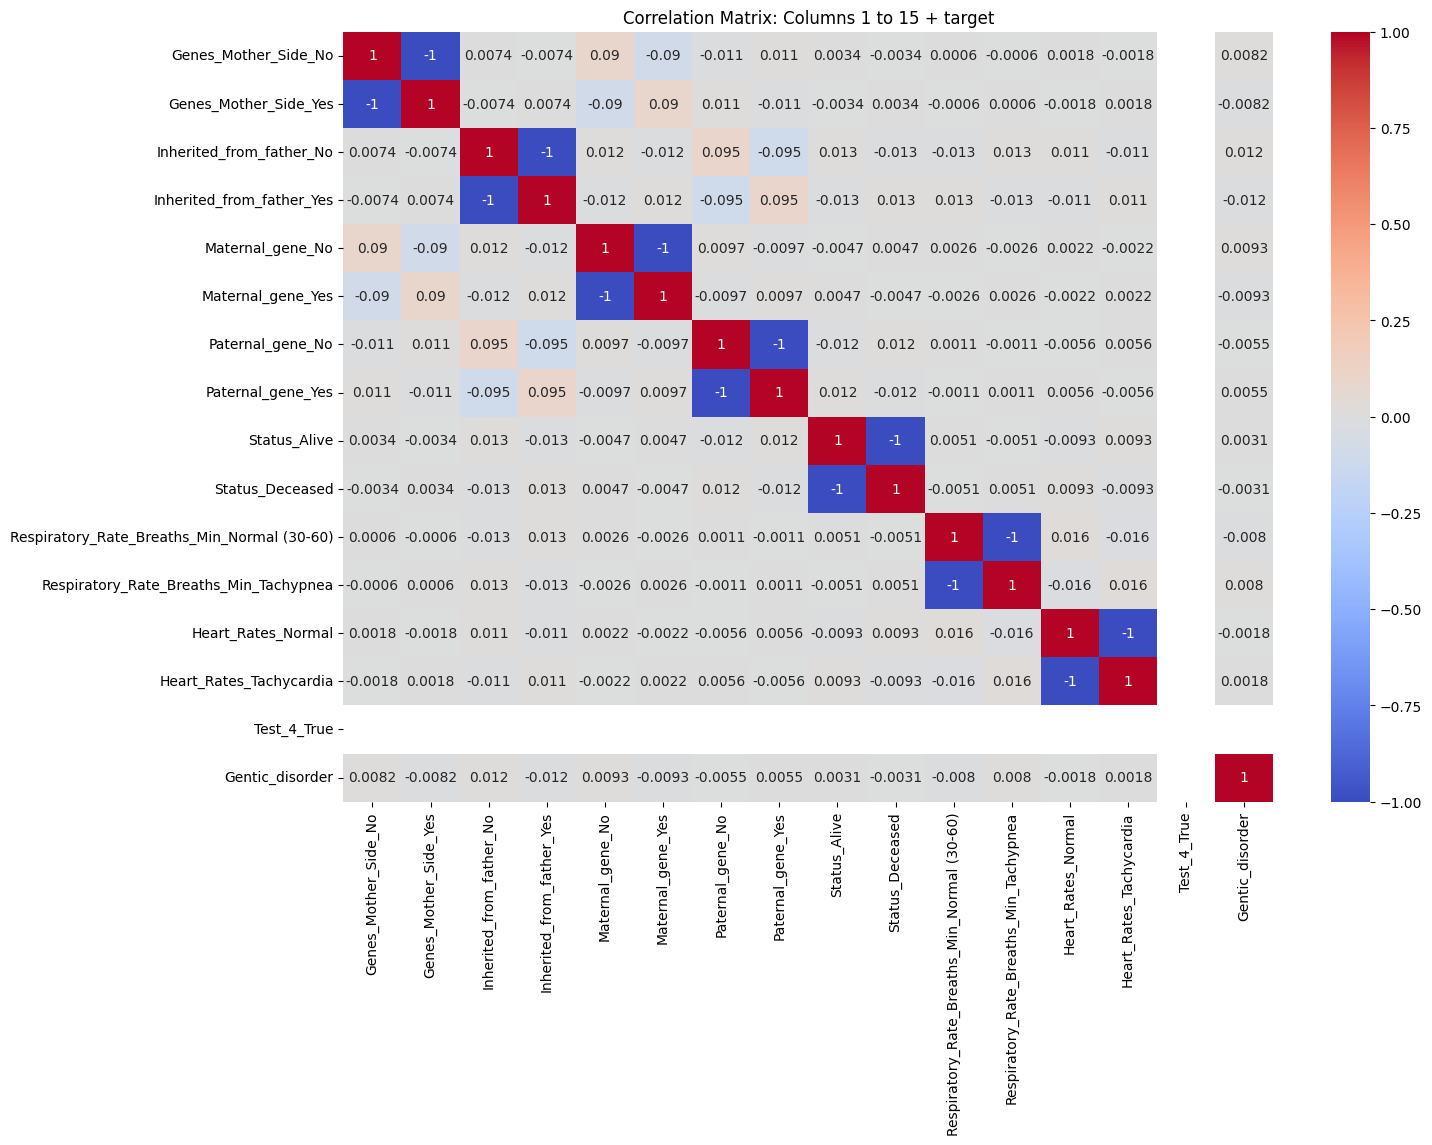

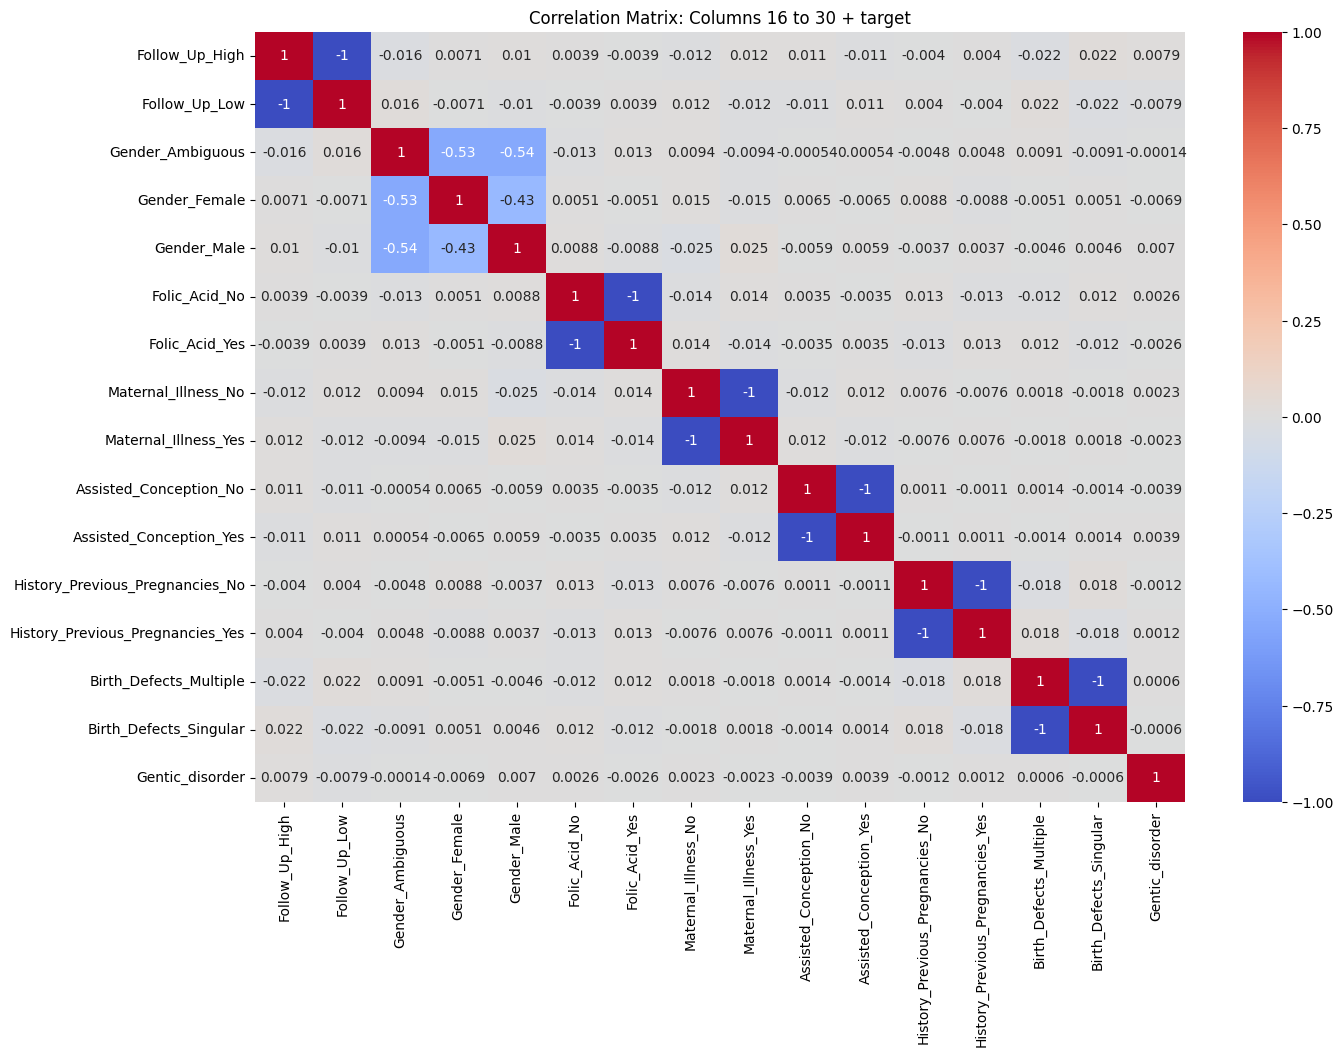

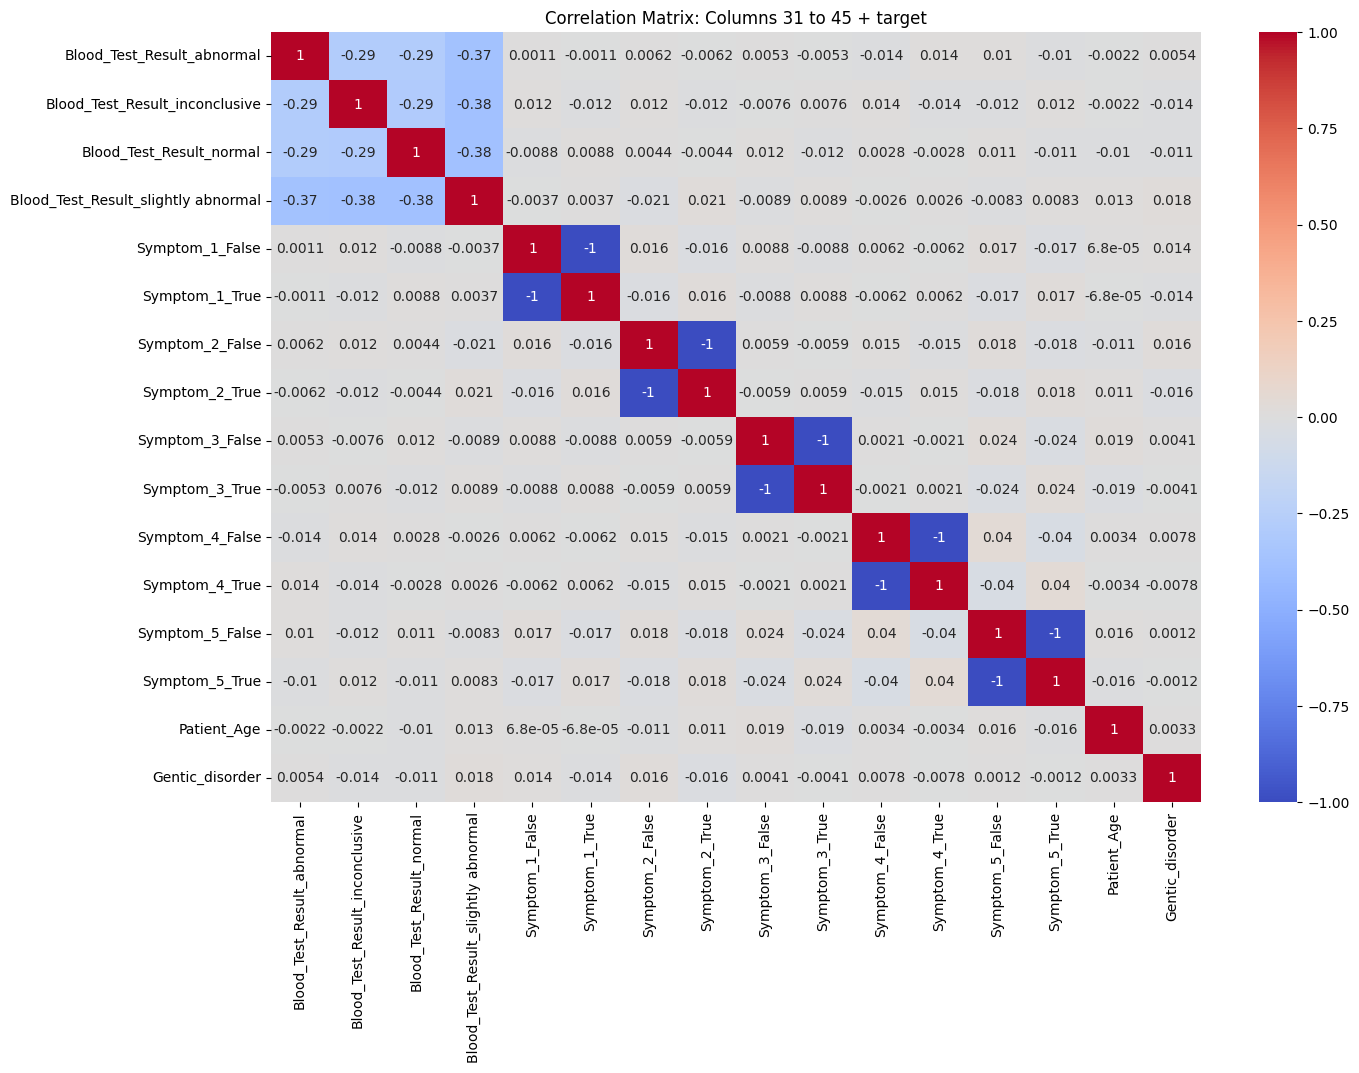

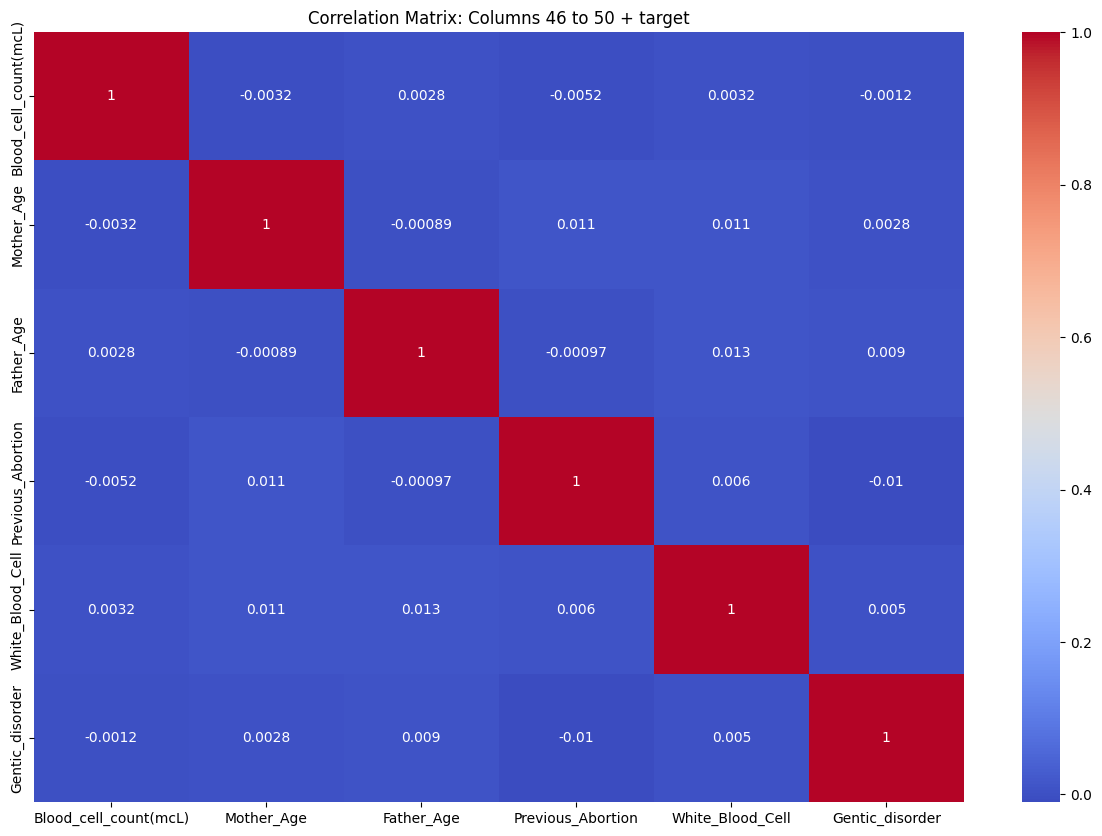

In [ ]:
df = X_encoded.copy()
df["Gentic_disorder"] = y_Genetic_Disorder_encoded

chunk_size = 15
n_features = df.shape[1] - 1
feature_names = df.columns.drop("Gentic_disorder")

for i in range(0, n_features, chunk_size):
    subset = df[list(feature_names[i:i+chunk_size]) + ["Gentic_disorder"]]
    corr = subset.corr()

    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix: Columns {i+1} to {min(i+chunk_size, n_features)} + target")
    plt.show()


# Normalizing

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [ ]:
X_scaled.head(3)

Genes_Mother_Side_No  Genes_Mother_Side_Yes  Inherited_from_father_No  \
0              -0.82271                0.82271                  0.803847   
1              -0.82271                0.82271                 -1.244019   
2              -0.82271                0.82271                  0.803847   

   Inherited_from_father_Yes  Maternal_gene_No  Maternal_gene_Yes  \
0                  -0.803847         -0.806672           0.806672   
1                   1.244019          1.239660          -1.239660   
2                  -0.803847          1.239660          -1.239660   

   Paternal_gene_No  Paternal_gene_Yes  Status_Alive  Status_Deceased  ...  \
0          0.873033          -0.873033      0.991459        -0.991459  ...   
1          0.873033          -0.873033     -1.008614         1.008614  ...   
2          0.873033          -0.873033      0.991459        -0.991459  ...   

   Symptom_4_False  Symptom_4_True  Symptom_5_False  Symptom_5_True  \
0        -0.916811        0.916811        -0.977962        0.977962   
1        -0.916811        0.916811         1.022535       -1.022535   
2        -0.916811        0.916811        -0.977962        0.977962   

   Patient_Age  Blood_cell_count(mcL)  Mother_Age  Father_Age  \
0    -1.172960              -0.694013   -0.044880   -0.064485   
1    -0.696099               0.055005   -0.044880   -1.664000   
2    -0.219238              -0.031701    0.781326   -1.752862   

   Previous_Abortion  White_Blood_Cell  
0          -0.658746          0.938948  
1          -0.658746         -0.774993  
2           1.523499         -0.000777  

[3 rows x 50 columns]

### BASELINE

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

In [ ]:
score_baseline_DT = cross_validate(DecisionTreeClassifier(), X_scaled ,  y_Genetic_Disorder_encoded, cv=5, scoring= scoring)
print("Accuracy:", score_baseline_DT['test_accuracy'].mean())
print("Precision:", score_baseline_DT['test_precision'].mean())
print("Recall:", score_baseline_DT['test_recall'].mean())
print("F1 Score:", score_baseline_DT['test_f1'].mean())

Accuracy: 0.48809881024296187
Precision: 0.4240303158558857
Recall: 0.42464704557520944
F1 Score: 0.42420698573656007


### Predict Baseline

In [ ]:
X.shape

(19703, 27)

In [ ]:
test.shape

(9465, 27)

In [ ]:
# OneHotEncoder
X_test_encoded = ohe.transform(test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_feature_names)

# StandardScaler
X_test_scaled = scaler.transform(X_test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_scaled, y_Genetic_Disorder_encoded)
y_pred = model.predict(X_test_scaled)
y_pred


array([1, 0, 0, ..., 0, 1, 1], shape=(9465,))

In [ ]:
y_pred_labels = le.inverse_transform(y_pred)
test_with_pred = test.copy()
test_with_pred['Predicted_Genetic_Disorder'] = y_pred_labels

In [ ]:
test_with_pred

Patient_Age Genes_Mother_Side Inherited_from_father Maternal_gene  \
0             6.0                No                   Yes            No   
1            10.0               Yes                    No           Yes   
2             5.0                No                    No            No   
3            13.0                No                   Yes           Yes   
4             5.0                No                    No           Yes   
...           ...               ...                   ...           ...   
9460          9.0               Yes                   Yes           Yes   
9461          1.0               Yes                    No           Yes   
9462          2.0                No                   Yes            No   
9463         13.0                No                   Yes            No   
9464         12.0                No                    No           Yes   

     Paternal_gene  Blood_cell_count(mcL)  Mother_Age  Father_Age    Status  \
0               No               4.981655        38.0        61.0     Alive   
1              Yes               5.118890        33.0        53.0     Alive   
2               No               4.876204        48.0        60.0  Deceased   
3               No               4.687767        25.0        55.0     Alive   
4              Yes               5.152362        41.0        38.0  Deceased   
...            ...                    ...         ...         ...       ...   
9460            No               4.878335        28.0        63.0     Alive   
9461           Yes               4.927151        37.0        62.0  Deceased   
9462            No               4.898352        24.0        32.0  Deceased   
9463            No               4.804840        36.0        56.0     Alive   
9464           Yes               5.421236        40.0        35.0  Deceased   

     Respiratory_Rate_Breaths_Min  ... Previous_Abortion  Birth_Defects  \
0                       Tachypnea  ...               2.0       Multiple   
1                  Normal (30-60)  ...             -99.0       Multiple   
2                  Normal (30-60)  ...               0.0       Singular   
3                  Normal (30-60)  ...             -99.0       Singular   
4                       Tachypnea  ...             -99.0       Multiple   
...                           ...  ...               ...            ...   
9460               Normal (30-60)  ...               2.0       Multiple   
9461               Normal (30-60)  ...             -99.0       Singular   
9462                    Tachypnea  ...               3.0       Singular   
9463               Normal (30-60)  ...               1.0       Singular   
9464               Normal (30-60)  ...               0.0       Singular   

     White_Blood_Cell  Blood_Test_Result Symptom_1 Symptom_2 Symptom_3  \
0          -99.000000  slightly abnormal      True      True      True   
1            8.179584             normal     False     False     False   
2          -99.000000  slightly abnormal     False     False      True   
3            6.884071             normal      True     False      True   
4            6.195178             normal      True      True      True   
...               ...                ...       ...       ...       ...   
9460         7.234960           abnormal     False      True      True   
9461         4.859536           abnormal     False      True     False   
9462         5.696062             normal     False      True     False   
9463         3.000000       inconclusive      True      True      True   
9464         7.492765           abnormal      True      True      True   

     Symptom_4  Symptom_5                    Predicted_Genetic_Disorder  
0         True       True  Multifactorial genetic inheritance disorders  
1         True      False   Mitochondrial genetic inheritance disorders  
2         True      False   Mitochondrial genetic inheritance disorders  
3        False       True   Mitochondrial genetic inheritance disorder

## Make Pipeline

### Define sub-pipelines

In [ ]:
preproc_numerical = make_pipeline(
    StandardScaler()
)

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# Combine into a single preprocessor
preproc = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_categorical, make_column_selector(dtype_include=["object", "string", "bool"])),
    remainder="drop"
)

preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11cd3ef50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11ca20af0>)])

### For Featchers

In [ ]:
# Fit and transform
X_encoded = preproc.fit_transform(X)

# Get feature names
categorical_cols = X.select_dtypes(include=['object', 'string', 'bool']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

ohe = preproc.named_transformers_['pipeline-2'].named_steps['onehotencoder']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(numeric_cols) + list(ohe_feature_names)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)
X_encoded.head(2)

Patient_Age  Blood_cell_count(mcL)  Mother_Age  Father_Age  \
0    -1.172960              -0.694013    -0.04488   -0.064485   
1    -0.696099               0.055005    -0.04488   -1.664000   

   Previous_Abortion  White_Blood_Cell  Genes_Mother_Side_No  \
0          -0.658746          0.938948                   0.0   
1          -0.658746         -0.774993                   0.0   

   Genes_Mother_Side_Yes  Inherited_from_father_No  Inherited_from_father_Yes  \
0                    1.0                       1.0                        0.0   
1                    1.0                       0.0                        1.0   

   ...  Symptom_1_False  Symptom_1_True  Symptom_2_False  Symptom_2_True  \
0  ...              0.0             1.0              0.0             1.0   
1  ...              0.0             1.0              0.0             1.0   

   Symptom_3_False  Symptom_3_True  Symptom_4_False  Symptom_4_True  \
0              0.0             1.0              0.0             1.0   
1              0.0             1.0              0.0             1.0   

   Symptom_5_False  Symptom_5_True  
0              0.0             1.0  
1              1.0             0.0  

[2 rows x 50 columns]

### For Target

In [ ]:
le = LabelEncoder()
y_Genetic_Disorder_encoded = le.fit_transform(y_Genetic_Disorder)
y_Genetic_Disorder_encoded = pd.Series(y_Genetic_Disorder_encoded)
y_Genetic_Disorder_encoded.value_counts()

0    10069
2     7602
1     2032
Name: count, dtype: int64

In [ ]:
# Fit and transform
X_test_encoded = preproc.transform(test)

## Modeling with Augmentation: SMOTE 

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
def apply_borderline_smote(X, y, random_state=42):
    sm = BorderlineSMOTE(random_state=random_state)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

In [ ]:
#check the if the augment done
print(y_Genetic_Disorder_encoded.value_counts())
X_res, y_res = apply_borderline_smote(X_encoded, y_Genetic_Disorder_encoded)
print(pd.Series(y_res).value_counts())

0    10069
2     7602
1     2032
Name: count, dtype: int64
0    10069
2    10069
1    10069
Name: count, dtype: int64


### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

In [ ]:
# XGB with CV
score_xgb_cv=cross_validate(model_xgb, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_xgb_cv['test_accuracy'].mean())
print("Precision:", score_xgb_cv['test_precision'].mean())
print("Recall:", score_xgb_cv['test_recall'].mean())
print("F1 Score:", score_xgb_cv['test_f1'].mean())

Accuracy: 0.649193602077298
Precision: 0.6898511470760897
Recall: 0.6491911479718143
F1 Score: 0.6233817097724556


In [ ]:
# GridSearch for XGBoost
allow_grid_searching = True
if allow_grid_searching:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    search_xgb = GridSearchCV(
        model_xgb,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )

    search_xgb.fit(X_res, y_res)

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_xgb.best_params_}')
    print(f'Best score 👉 {search_xgb.best_score_}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END 

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    colsample_bytree=0.8,
    subsample=0.8,
    learning_rate=0.01
    )

In [ ]:
# XGB with CV
score_xgb_cv=cross_validate(model_xgb, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_xgb_cv['test_accuracy'].mean())
print("Precision:", score_xgb_cv['test_precision'].mean())
print("Recall:", score_xgb_cv['test_recall'].mean())
print("F1 Score:", score_xgb_cv['test_f1'].mean())

Accuracy: 0.6936179404325327
Precision: 0.7070528698415541
Recall: 0.6936154979393295
F1 Score: 0.6795522203345822


### SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()

In [ ]:
# SVM with CV
score_svm_cv=cross_validate(model_svm, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_svm_cv['test_accuracy'].mean())
print("Precision:", score_svm_cv['test_precision'].mean())
print("Recall:", score_svm_cv['test_recall'].mean())
print("F1 Score:", score_svm_cv['test_f1'].mean())

Accuracy: 0.6872607742053487
Precision: 0.6900871041545591
Recall: 0.6872589998837415
F1 Score: 0.6725342071875627


In [ ]:
# GridSearch for SVC
if allow_grid_searching:
    param_grid = {
        'C': [0.5, 0.7, 1, 2, 5, 10],  # Regularization parameter
        'kernel': ['rbf', 'linear', 'poly'],  # Kernel type
        'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf', 'poly'
        # 'degree': [2, 3],  # Degree for polynomial kernel (uncomment if using 'poly')
        # 'coef0': [0.0, 0.1, 0.5]  # Independent term in kernel function (uncomment for 'poly'/'sigmoid')
    }

    search_svc = GridSearchCV(
        model_svm,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )

    search_svc.fit(X_res, y_res)

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_svc.best_params_}')
    print(f'Best score 👉 {search_svc.best_score_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  38.4s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=  40.1s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=  44.1s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=  44.3s
[CV] END ....................C=0.5, gamma=scale, kernel=poly; total time=  44.3s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  46.9s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  47.3s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  47.5s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=  50.3s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=  57.6s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time= 1.1min
[CV] END ..................C=0.5, gamma=scale, 

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .........................C=2, gamma=0.1, kernel=rbf; total time= 2.2min
[CV] END .........................C=2, gamma=0.1, kernel=rbf; total time= 2.3min
[CV] END ......................C=2, gamma=0.1, kernel=linear; total time= 2.2min
[CV] END .........................C=2, gamma=0.1, kernel=rbf; total time= 2.4min
[CV] END ......................C=2, gamma=0.1, kernel=linear; total time= 2.5min
[CV] END ......................C=2, gamma=0.1, kernel=linear; total time= 2.5min
[CV] END ........................C=2, gamma=0.01, kernel=rbf; total time=  47.0s
[CV] END ......................C=2, gamma=0.1, kernel=linear; total time= 2.5min
[CV] END ........................C=2, gamma=0.01, kernel=rbf; total time=  55.9s
[CV] END ........................C=2, gamma=0.01, kernel=rbf; total time=  55.1s
[CV] END ........................C=2, gamma=0.01, kernel=rbf; total time=  54.5s
[CV] END ........................C=2, gamma=0.01, kernel=rbf; total time=  54.3s
[CV] END ...................

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(
    kernel="rbf",
    C=5,
    gamma=0.1
)

In [ ]:
# SVM with CV
score_svm_cv=cross_validate(model_svm, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_svm_cv['test_accuracy'].mean())
print("Precision:", score_svm_cv['test_precision'].mean())
print("Recall:", score_svm_cv['test_recall'].mean())
print("F1 Score:", score_svm_cv['test_f1'].mean())

Accuracy: 0.7470485282052286
Precision: 0.7522686520622643
Recall: 0.7470447223796728
F1 Score: 0.7425867690736012


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [ ]:
# KNN with CV
score_knn_cv=cross_validate(model_knn, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_knn_cv['test_accuracy'].mean())
print("Precision:", score_knn_cv['test_precision'].mean())
print("Recall:", score_knn_cv['test_recall'].mean())
print("F1 Score:", score_knn_cv['test_f1'].mean())

Accuracy: 0.624128764597166
Precision: 0.6179911038669328
Recall: 0.6241284020631863
F1 Score: 0.5998401450327133


In [ ]:
# GridSearch the KNN
allow_grid_searching = True
if allow_grid_searching:
    param_grid =  {'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 15, 20 , 30],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski'],
                  'p': [1, 2, 3]}

    search_knn = GridSearchCV(
        model_knn,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )

    search_knn.fit(X_res, y_res);

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_knn.best_params_}')
    print(f'Best score 👉 {search_knn.best_score_}')

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] END metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=uniform; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=uniform; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=distance; total time=   0.7s
[CV] END metric=euclidean, n_neighbors=4, p=3, weights=uniform; total time=   0.9s
[CV] END metric=eu

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.8s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=distance; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=distance; total time=   0.8s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=uniform; total time=   1.1s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=uniform; total time=   1.1s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=distance; total time=   0.9s
[CV] END metric=euclidean, n_neighbors=5, p=3, weights=uniform; total time=   1.1s
[CV] END metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   1.1s
[CV] END metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.8s
[CV] END metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   1.1s
[CV] END metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(
    n_neighbors=4,
    metric="manhattan",
    weights="distance",
    p=1
)

In [ ]:
# KNN with CV
score_knn_cv=cross_validate(model_knn, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)
print("Accuracy:", score_knn_cv['test_accuracy'].mean())
print("Precision:", score_knn_cv['test_precision'].mean())
print("Recall:", score_knn_cv['test_recall'].mean())
print("F1 Score:", score_knn_cv['test_f1'].mean())

Accuracy: 0.72791321533901
Precision: 0.7267728650823223
Recall: 0.7279089098614714
F1 Score: 0.7164758038406251


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [ ]:
score_rfc_cv = cross_validate(model_rf , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_rfc_cv['test_accuracy'].mean())
print("Precision:", score_rfc_cv['test_precision'].mean())
print("Recall:", score_rfc_cv['test_recall'].mean())
print("F1 Score:", score_rfc_cv['test_f1'].mean())

Accuracy: 0.7130839736258813
Precision: 0.7292433646719372
Recall: 0.7130808467240329
F1 Score: 0.7031052242184281


In [ ]:
# GridSearch the rfc
allow_grid_searching = True
if allow_grid_searching:
    param_grid = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy', 'log_loss']
    }

    search_rf = GridSearchCV(
        model_rf,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy'
    )

    search_rf.fit(X_res, y_res)

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_rf.best_params_}')
    print(f'Best score 👉 {search_rf.best_score_}')

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total tim

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  14.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, m

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(
    bootstrap=True,
    criterion="gini",
    max_depth=30,
    min_samples_leaf=1
)

In [ ]:
score_rfc_cv = cross_validate(model_rf , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_rfc_cv['test_accuracy'].mean())
print("Precision:", score_rfc_cv['test_precision'].mean())
print("Recall:", score_rfc_cv['test_recall'].mean())
print("F1 Score:", score_rfc_cv['test_f1'].mean())

Accuracy: 0.7137792939902392
Precision: 0.7303265067003266
Recall: 0.7137760958930803
F1 Score: 0.7038268101910489


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()

In [ ]:
score_gb_cv = cross_validate(model_gb , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_gb_cv['test_accuracy'].mean())
print("Precision:", score_gb_cv['test_precision'].mean())
print("Recall:", score_gb_cv['test_recall'].mean())
print("F1 Score:", score_gb_cv['test_f1'].mean())

Accuracy: 0.639095284068191
Precision: 0.6783159842744991
Recall: 0.6390929662259859
F1 Score: 0.6012938552201208


In [ ]:
## RandomizedSearchCV the gb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500, 800],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


search_gb = RandomizedSearchCV(
    model_gb,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)

search_gb.fit(X_res, y_res)

print("\n----------------------------------------\n")
print(f"Best params = {search_gb.best_params_}")
print(f"Best score = {search_gb.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1.0; total time=  30.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1.0; total time=  30.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, subsample=1.0; total time=  30.3s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.6; total time=  38.9s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.6; total time=  39.1s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.6; total time=  39.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500, subsample=1.0; total 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=2,
    max_depth=5,
    learning_rate=0.01
)

In [ ]:
score_gb_cv = cross_validate(model_gb , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_gb_cv['test_accuracy'].mean())
print("Precision:", score_gb_cv['test_precision'].mean())
print("Recall:", score_gb_cv['test_recall'].mean())
print("F1 Score:", score_gb_cv['test_f1'].mean())

Accuracy: 0.6563428236521911
Precision: 0.6804513615137804
Recall: 0.6563406378894683
F1 Score: 0.6317059142231833


### CatBoost

In [ ]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()

In [ ]:
score_cat_cv = cross_validate(model_cat , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_cat_cv['test_accuracy'].mean())
print("Precision:", score_cat_cv['test_precision'].mean())
print("Recall:", score_cat_cv['test_recall'].mean())
print("F1 Score:", score_cat_cv['test_f1'].mean())

Learning rate set to 0.093082
0:	learn: 1.0443695	total: 8.7ms	remaining: 8.69s
1:	learn: 1.0004065	total: 14.1ms	remaining: 7.03s
2:	learn: 0.9643228	total: 19.9ms	remaining: 6.62s
3:	learn: 0.9330363	total: 24.9ms	remaining: 6.2s
4:	learn: 0.9070947	total: 30.1ms	remaining: 6s
5:	learn: 0.8854315	total: 34.9ms	remaining: 5.78s
6:	learn: 0.8655314	total: 39.5ms	remaining: 5.61s
7:	learn: 0.8476215	total: 44.3ms	remaining: 5.5s
8:	learn: 0.8307880	total: 48.8ms	remaining: 5.38s
9:	learn: 0.8175007	total: 53.7ms	remaining: 5.32s
10:	learn: 0.8051294	total: 58.2ms	remaining: 5.23s
11:	learn: 0.7938390	total: 63.3ms	remaining: 5.21s
12:	learn: 0.7843168	total: 68.3ms	remaining: 5.18s
13:	learn: 0.7742224	total: 73.5ms	remaining: 5.18s
14:	learn: 0.7657589	total: 78.4ms	remaining: 5.15s
15:	learn: 0.7569654	total: 83.2ms	remaining: 5.12s
16:	learn: 0.7491665	total: 87.9ms	remaining: 5.08s
17:	learn: 0.7424125	total: 92.7ms	remaining: 5.06s
18:	learn: 0.7357092	total: 97.8ms	remaining: 5.05

In [ ]:
## RandomizedSearchCV the cat
param_grid = {
    'iterations': [300, 600, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.5, 1.0, 2.0, 5.0]
}

search_cat = RandomizedSearchCV(
    estimator=model_cat,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search_cat.fit(X_res, y_res)
print("\n----------------------------------------\n")
print(f"Best params = {search_cat.best_params_}")
print(f"Best score = {search_cat.best_score_:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 1.0700316	total: 69.8ms	remaining: 20.9s
0:	learn: 1.0745144	total: 68.5ms	remaining: 20.5s
1:	learn: 1.0449153	total: 82.9ms	remaining: 12.4s
1:	learn: 1.0527788	total: 79.1ms	remaining: 11.8s
2:	learn: 1.0213898	total: 94.7ms	remaining: 9.38s
0:	learn: 1.0491652	total: 75.9ms	remaining: 1m 15s
0:	learn: 1.0715738	total: 85.1ms	remaining: 25.5s
2:	learn: 1.0331429	total: 102ms	remaining: 10.1s
3:	learn: 1.0011909	total: 110ms	remaining: 8.18s
0:	learn: 1.0552708	total: 78.5ms	remaining: 1m 18s
1:	learn: 1.0151473	total: 94.3ms	remaining: 47s
1:	learn: 1.0475428	total: 104ms	remaining: 15.5s
4:	learn: 0.9823956	total: 134ms	remaining: 7.92s
0:	learn: 1.0534332	total: 87.6ms	remaining: 1m 27s
3:	learn: 1.0161084	total: 133ms	remaining: 9.81s
1:	learn: 1.0311618	total: 103ms	remaining: 51.5s
2:	learn: 1.0251373	total: 123ms	remaining: 12.2s
2:	learn: 0.9742173	total: 123ms	remaining: 41s
0:	learn: 1.0518723	total: 88.

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


236:	learn: 0.6431094	total: 22.8s	remaining: 1m 13s
291:	learn: 0.4548267	total: 27.8s	remaining: 762ms
16:	learn: 0.9389131	total: 1.13s	remaining: 38.8s
823:	learn: 0.4998525	total: 45.2s	remaining: 9.65s
30:	learn: 0.9076250	total: 1.94s	remaining: 35.6s
272:	learn: 0.5204733	total: 26.4s	remaining: 1m 10s
569:	learn: 0.5650206	total: 31.9s	remaining: 1.68s
813:	learn: 0.5379090	total: 43.7s	remaining: 9.98s
74:	learn: 0.7787768	total: 4.6s	remaining: 32.2s
278:	learn: 0.5081207	total: 27s	remaining: 2.03s
7:	learn: 1.0490251	total: 747ms	remaining: 27.3s
824:	learn: 0.4997096	total: 45.2s	remaining: 9.59s
97:	learn: 0.7146366	total: 9.52s	remaining: 1m 27s
570:	learn: 0.5648344	total: 31.9s	remaining: 1.62s
879:	learn: 0.3805419	total: 45.6s	remaining: 6.22s
292:	learn: 0.4542935	total: 27.9s	remaining: 667ms
17:	learn: 0.9336164	total: 1.2s	remaining: 38.9s
237:	learn: 0.6424910	total: 22.9s	remaining: 1m 13s
814:	learn: 0.5378023	total: 43.7s	remaining: 9.93s
825:	learn: 0.49941

In [ ]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(
    learning_rate=0.1,
    l2_leaf_reg=5,
    iterations=1000,
    depth=8,
    bagging_temperature=2.0
)

In [ ]:
score_cat_cv = cross_validate(model_cat , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_cat_cv['test_accuracy'].mean())
print("Precision:", score_cat_cv['test_precision'].mean())
print("Recall:", score_cat_cv['test_recall'].mean())
print("F1 Score:", score_cat_cv['test_f1'].mean())

0:	learn: 1.0387218	total: 10.6ms	remaining: 10.6s
1:	learn: 0.9893622	total: 21.9ms	remaining: 10.9s
2:	learn: 0.9510740	total: 32.7ms	remaining: 10.9s
3:	learn: 0.9159196	total: 43.5ms	remaining: 10.8s
4:	learn: 0.8868580	total: 53.8ms	remaining: 10.7s
5:	learn: 0.8622541	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8407594	total: 74.8ms	remaining: 10.6s
7:	learn: 0.8237215	total: 85.5ms	remaining: 10.6s
8:	learn: 0.8060152	total: 96.5ms	remaining: 10.6s
9:	learn: 0.7915700	total: 107ms	remaining: 10.6s
10:	learn: 0.7777515	total: 118ms	remaining: 10.6s
11:	learn: 0.7663718	total: 128ms	remaining: 10.5s
12:	learn: 0.7546268	total: 138ms	remaining: 10.5s
13:	learn: 0.7433364	total: 149ms	remaining: 10.5s
14:	learn: 0.7339979	total: 160ms	remaining: 10.5s
15:	learn: 0.7247228	total: 170ms	remaining: 10.5s
16:	learn: 0.7169363	total: 181ms	remaining: 10.4s
17:	learn: 0.7080339	total: 191ms	remaining: 10.4s
18:	learn: 0.7001572	total: 202ms	remaining: 10.4s
19:	learn: 0.6931682	total: 212m

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier()

In [ ]:
score_et_cv = cross_validate(model_et , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_et_cv['test_accuracy'].mean())
print("Precision:", score_et_cv['test_precision'].mean())
print("Recall:", score_et_cv['test_recall'].mean())
print("F1 Score:", score_et_cv['test_f1'].mean())

Accuracy: 0.73662035562901
Precision: 0.7441985860917476
Recall: 0.73661675770846
F1 Score: 0.7297811961466085


In [ ]:
## RandomizedSearchCV the et
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
search_et = RandomizedSearchCV(
    estimator=model_et,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search_et.fit(X_res, y_res)

print("\n----------------------------------------\n")
print(f"Best params = {search_et.best_params_}")
print(f"Best score = {search_et.best_score_:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   6.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   6.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   6.5s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; t

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  13.1s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  12.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  12.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  12.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  13.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=50

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=50,
    bootstrap=True
)

In [ ]:
score_et_cv = cross_validate(model_et , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_et_cv['test_accuracy'].mean())
print("Precision:", score_et_cv['test_precision'].mean())
print("Recall:", score_et_cv['test_recall'].mean())
print("F1 Score:", score_et_cv['test_f1'].mean())

Accuracy: 0.7394009247522488
Precision: 0.7479899823658893
Recall: 0.7393974090622144
F1 Score: 0.7301867962549384


In [ ]:
## GridSearchCV the et
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# GridSearchCV
search_et = GridSearchCV(
    estimator=model_et,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit on balanced data
search_et.fit(X_res, y_res)

print("\n----------------------------------------\n")
print(f"Best params = {search_et.best_params_}")
print(f"Best score = {search_et.best_score_:.4f}")


Fitting 3 folds for each of 1350 candidates, totalling 4050 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  19.6s
[CV] END bootstrap=True, max_dept

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False
)

In [ ]:
score_et_cv = cross_validate(model_et , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_et_cv['test_accuracy'].mean())
print("Precision:", score_et_cv['test_precision'].mean())
print("Recall:", score_et_cv['test_recall'].mean())
print("F1 Score:", score_et_cv['test_f1'].mean())

Accuracy: 0.7452273526905219
Precision: 0.7529958392043362
Recall: 0.7452236727408883
F1 Score: 0.7380751653323456


### HistGradientBoostingClassifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_hgb = HistGradientBoostingClassifier()

In [ ]:
score_hgb_cv = cross_validate(model_hgb , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_hgb_cv['test_accuracy'].mean())
print("Precision:", score_hgb_cv['test_precision'].mean())
print("Recall:", score_hgb_cv['test_recall'].mean())
print("F1 Score:", score_hgb_cv['test_f1'].mean())

Accuracy: 0.649226977673967
Precision: 0.69339028077295
Recall: 0.6492249731265148
F1 Score: 0.617886060230648


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [ ]:
score_lr_cv = cross_validate(model_lr , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_lr_cv['test_accuracy'].mean())
print("Precision:", score_lr_cv['test_precision'].mean())
print("Recall:", score_lr_cv['test_recall'].mean())
print("F1 Score:", score_lr_cv['test_f1'].mean())

Accuracy: 0.5765231417379014
Precision: 0.5606820340035376
Recall: 0.5765226458341862
F1 Score: 0.5597529534292399


### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier()

In [ ]:
score_lgb_cv = cross_validate(model_lgb , X_res ,  y_res , cv=5, scoring= scoring)
print("Accuracy:", score_lgb_cv['test_accuracy'].mean())
print("Precision:", score_lgb_cv['test_precision'].mean())
print("Recall:", score_lgb_cv['test_recall'].mean())
print("F1 Score:", score_lgb_cv['test_f1'].mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12495
[LightGBM] [Info] Number of data points in the train set: 24165, number of used features: 49
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12495
[LightGBM] [Info] Number of data points in the train set: 24165, number of used features: 49
[LightGBM] [Info] Start training f

### RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
model_ridge = RidgeClassifier()

In [ ]:
score_ridge_cv = cross_validate(model_ridge, X_res, y_res, cv=5, scoring=scoring)
print("Accuracy:", score_ridge_cv['test_accuracy'].mean())
print("Precision:", score_ridge_cv['test_precision'].mean())
print("Recall:", score_ridge_cv['test_recall'].mean())
print("F1 Score:", score_ridge_cv['test_f1'].mean())

Accuracy: 0.560831005781359
Precision: 0.5555650578038664
Recall: 0.5608305530766338
F1 Score: 0.5255327608158551


### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier()

In [ ]:
score_bag_cv = cross_validate(model_bag, X_res, y_res, cv=5, scoring=scoring)
print("Accuracy:", score_bag_cv['test_accuracy'].mean())
print("Precision:", score_bag_cv['test_precision'].mean())
print("Recall:", score_bag_cv['test_recall'].mean())
print("F1 Score:", score_bag_cv['test_f1'].mean())

Accuracy: 0.6837859751370161
Precision: 0.6904594253047072
Recall: 0.6837833460198217
F1 Score: 0.6733625997073209


### NuSVC

In [ ]:
from sklearn.svm import NuSVC
model_nusvc = NuSVC()

In [ ]:
score_nusvc_cv = cross_validate(model_nusvc, X_res, y_res, cv=5, scoring=scoring)
print("Accuracy:", score_nusvc_cv['test_accuracy'].mean())
print("Precision:", score_nusvc_cv['test_precision'].mean())
print("Recall:", score_nusvc_cv['test_recall'].mean())
print("F1 Score:", score_nusvc_cv['test_f1'].mean())

Accuracy: 0.6586912908542153
Precision: 0.6572764484519343
Recall: 0.6586884193490408
F1 Score: 0.6472667433453295


### BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
model_brf = BalancedRandomForestClassifier()

In [ ]:
score_brf_cv = cross_validate(model_brf, X_res, y_res, cv=5, scoring=scoring)
print("Accuracy:", score_brf_cv['test_accuracy'].mean())
print("Precision:", score_brf_cv['test_precision'].mean())
print("Recall:", score_brf_cv['test_recall'].mean())
print("F1 Score:", score_brf_cv['test_f1'].mean())

Accuracy: 0.7139446815512731
Precision: 0.7303128501369269
Recall: 0.7139417026665306
F1 Score: 0.7041263247917435


In [ ]:
## RandomizedSearchCV brf
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

search_brf = RandomizedSearchCV(
    estimator=model_brf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search_brf.fit(X_res, y_res)

print("\n----------------------------------------\n")
print(f"Best params = {search_brf.best_params_}")
print(f"Best score = {search_brf.best_score_:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  12.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  14.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  16.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; tot

/Users/altalhishahd/.pyenv/versions/3.10.6/envs/GenPredict/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  14.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END bootstrap=True, max_depth=30, ma

### VotingClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(
    n_neighbors=4,
    metric="manhattan",
    weights="distance",
    p=1
)
from sklearn.svm import SVC
model_svm = SVC(
    kernel="rbf",
    C=5,
    probability=True,
    gamma=0.1
)


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[('knn', model_knn), ('svm', model_svm)],
    voting='soft',
    n_jobs=-1
)

In [ ]:
score_voting = cross_validate(voting_model, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)

print("Accuracy:", score_voting['test_accuracy'].mean())
print("Precision:", score_voting['test_precision'].mean())
print("Recall:", score_voting['test_recall'].mean())
print("F1 Score:", score_voting['test_f1'].mean())

Accuracy: 0.753238630146279
Precision: 0.7550904660178004
Recall: 0.7532335910589772
F1 Score: 0.7468324606617242


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=50,
    bootstrap=True
)
from sklearn.svm import SVC
model_svm = SVC(
    kernel="rbf",
    C=5,
    probability=True,
    gamma=0.1
)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[('et', model_et), ('svm', model_svm)],
    voting='soft',
    n_jobs=-1
)

In [ ]:
score_voting = cross_validate(voting_model, X_res, y_res, cv=5, scoring=scoring, n_jobs=-1)

print("Accuracy:", score_voting['test_accuracy'].mean())
print("Precision:", score_voting['test_precision'].mean())
print("Recall:", score_voting['test_recall'].mean())
print("F1 Score:", score_voting['test_f1'].mean())

Accuracy: 0.7691627897878236
Precision: 0.7780040720148835
Recall: 0.7691579871517032
F1 Score: 0.7642247305388595
